<>:35: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\d'
C:\Users\arjun\AppData\Local\Temp\ipykernel_4648\1894858912.py:35: SyntaxWarning: invalid escape sequence '\d'
  df[reviews_column] = df[reviews_column].astype(str).str.replace(',', '').str.extract('(\d+)').fillna(0).astype(int)


📦 Columns detected: ['Title', 'Brand', 'Rating', 'Reviews', 'Price (₹)', 'Image URL', 'Product URL']
✅ Using columns:
- Product: Title
- Rating: Rating
- Reviews: Reviews


C:\Users\arjun\AppData\Local\Temp\ipykernel_4648\1894858912.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_column, y=product_column, data=top_5_reviews, palette='viridis')
C:\Users\arjun\AppData\Local\Temp\ipykernel_4648\1894858912.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


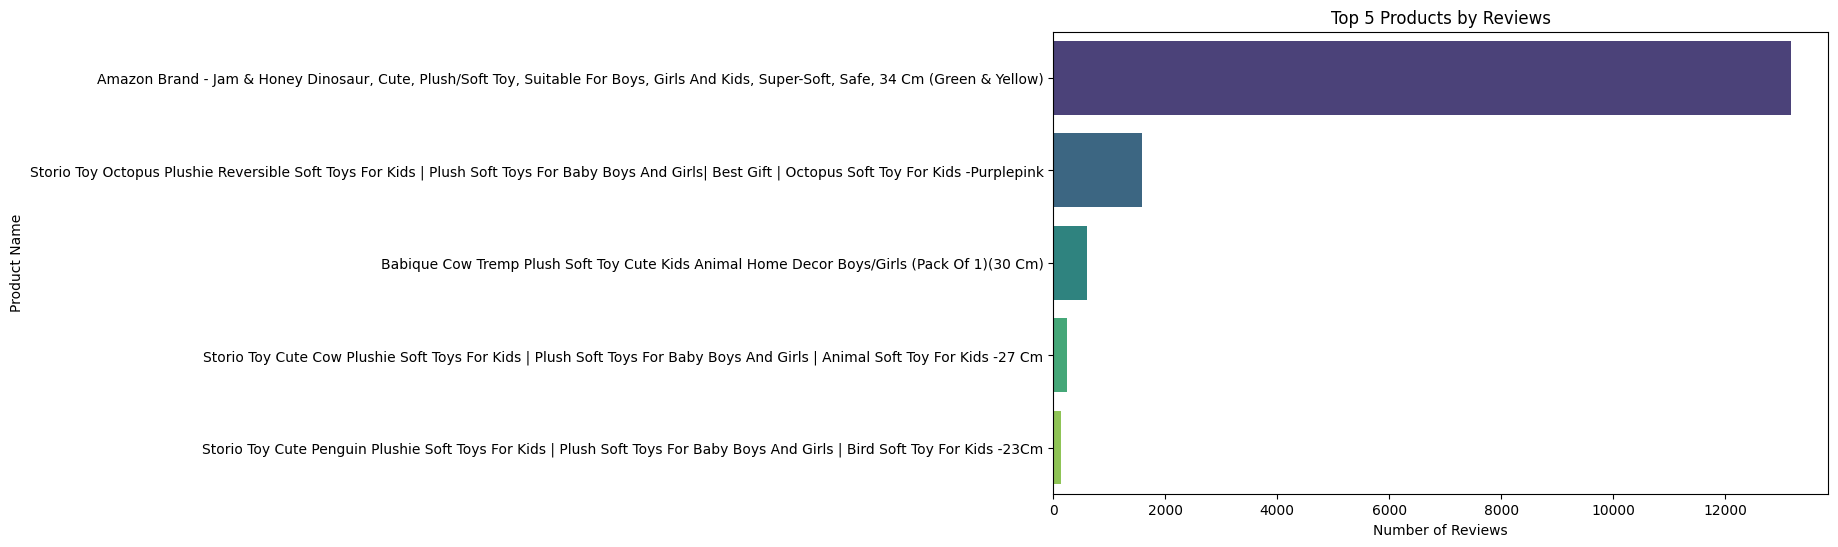

C:\Users\arjun\AppData\Local\Temp\ipykernel_4648\1894858912.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_column, y=product_column, data=top_5_ratings, palette='coolwarm')
C:\Users\arjun\AppData\Local\Temp\ipykernel_4648\1894858912.py:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


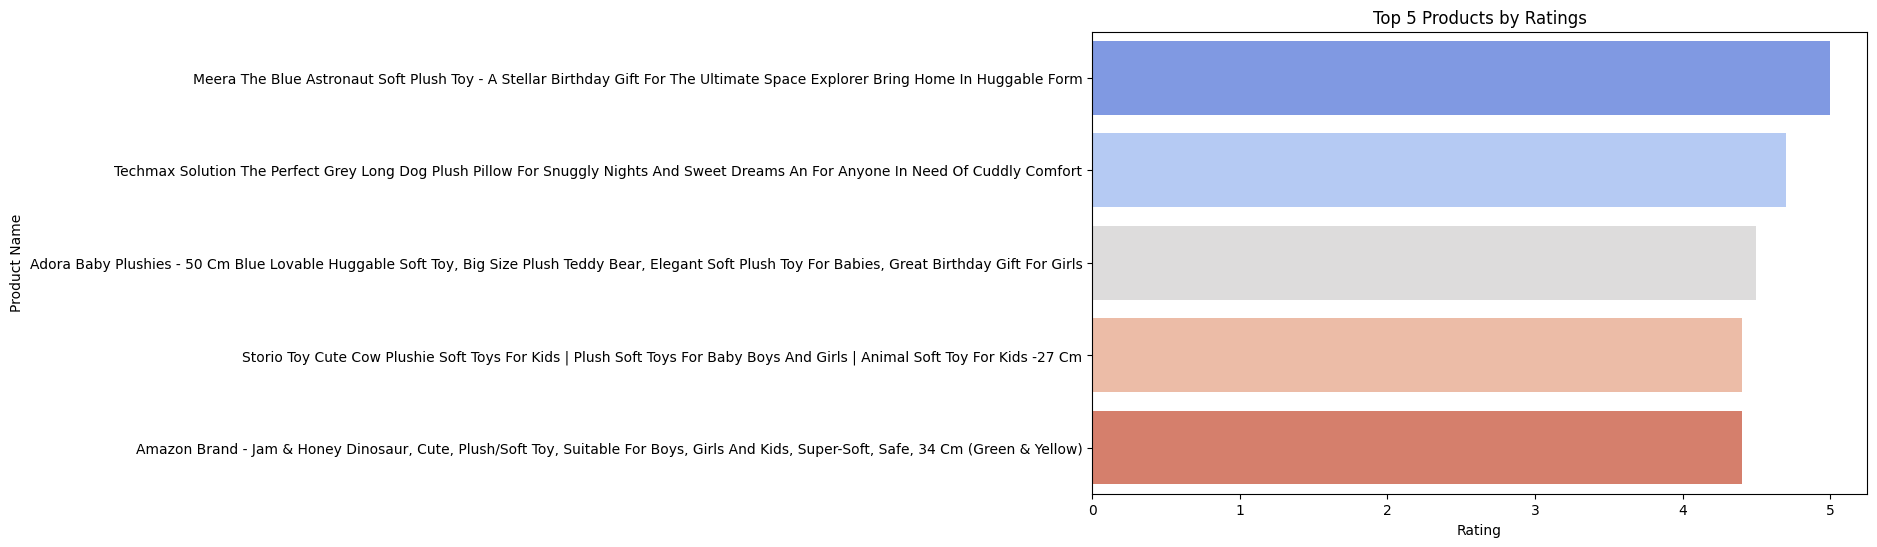

✅ Analysis complete! CSVs and plots saved to: D:\Assignmet


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def review_rating_distribution(input_file, output_dir):
    # Load dataset
    df = pd.read_csv(input_file)
    df.columns = df.columns.str.strip()

    # Debug: Show column names
    print("📦 Columns detected:", df.columns.tolist())

    # Identify columns
    rating_column = None
    reviews_column = None
    product_column = None

    for col in df.columns:
        if 'rating' in col.lower():
            rating_column = col
        elif 'reviews' in col.lower():
            reviews_column = col
        elif 'title' in col.lower() or 'name' in col.lower():  # Prefer 'Title' over 'Product URL'
            product_column = col

    if not rating_column or not reviews_column or not product_column:
        print("❌ Required columns not found!")
        return

    print(f"✅ Using columns:\n- Product: {product_column}\n- Rating: {rating_column}\n- Reviews: {reviews_column}")

    # Clean data
    df[rating_column] = pd.to_numeric(df[rating_column], errors='coerce').fillna(0).astype(float)
    df[reviews_column] = df[reviews_column].astype(str).str.replace(',', '').str.extract('(\d+)').fillna(0).astype(int)

    # Top 5 products
    top_5_reviews = df[[product_column, reviews_column]].sort_values(by=reviews_column, ascending=False).head(5)
    top_5_ratings = df[[product_column, rating_column]].sort_values(by=rating_column, ascending=False).head(5)

    # Create output folder if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Plot: Top 5 by Reviews
    plt.figure(figsize=(10, 6))
    sns.barplot(x=reviews_column, y=product_column, data=top_5_reviews, palette='viridis')
    plt.title('Top 5 Products by Reviews')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.savefig(f"{output_dir}/top_5_products_by_reviews.png")
    plt.show()

    # Plot: Top 5 by Ratings
    plt.figure(figsize=(10, 6))
    sns.barplot(x=rating_column, y=product_column, data=top_5_ratings, palette='coolwarm')
    plt.title('Top 5 Products by Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.savefig(f"{output_dir}/top_5_products_by_ratings.png")
    plt.show()

    # Save CSVs
    top_5_reviews.to_csv(f"{output_dir}/top_5_products_by_reviews.csv", index=False)
    top_5_ratings.to_csv(f"{output_dir}/top_5_products_by_ratings.csv", index=False)

    print("✅ Analysis complete! CSVs and plots saved to:", output_dir)

# 🧪 Run the function
input_file = r'D:\Assignment\cleaned_products.csv'
output_dir = r'D:\Assignmet'

review_rating_distribution(input_file, output_dir)
